In [1]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


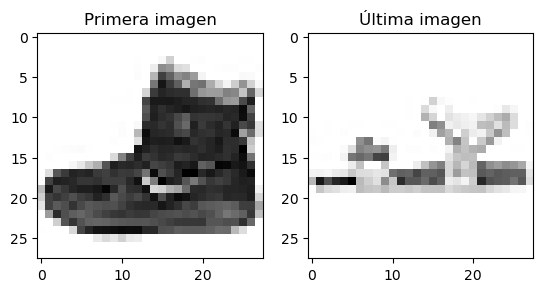

In [3]:
# Se plotea la primera imagen del dataset x_train
plt.subplot(1, 2, 1)
plt.imshow(x_train[0], cmap='Greys')
plt.title('Primera imagen')

# Se plotea la última imagen del dataset x_train
plt.subplot(1, 2, 2)
plt.imshow(x_train[59999], cmap='Greys')
plt.title('Última imagen')

plt.show()

In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [5]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15


422/422 [==============================] - 11s 23ms/step - loss: 0.7011 - accuracy: 0.7481 - val_loss: 0.4521 - val_accuracy: 0.8338
Epoch 2/15
422/422 [==============================] - 10s 24ms/step - loss: 0.4592 - accuracy: 0.8344 - val_loss: 0.3975 - val_accuracy: 0.8622
Epoch 3/15
422/422 [==============================] - 9s 22ms/step - loss: 0.4106 - accuracy: 0.8552 - val_loss: 0.3639 - val_accuracy: 0.8720
Epoch 4/15
422/422 [==============================] - 10s 23ms/step - loss: 0.3819 - accuracy: 0.8630 - val_loss: 0.3392 - val_accuracy: 0.8762
Epoch 5/15
422/422 [==============================] - 9s 22ms/step - loss: 0.3561 - accuracy: 0.8742 - val_loss: 0.3277 - val_accuracy: 0.8782
Epoch 6/15
422/422 [==============================] - 10s 24ms/step - loss: 0.3432 - accuracy: 0.8772 - val_loss: 0.3220 - val_accuracy: 0.8810
Epoch 7/15
422/422 [==============================] - 10s 23ms/step - loss: 0.3302 - accuracy: 0.8817 - val_loss: 0.3018 - val_accuracy

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.27074864506721497
Test accuracy: 0.9023000001907349


In [7]:
# Predecir las probabilidades de clase en los conjuntos de entrenamiento y prueba
y_train_probs = model.predict(x_train)
y_test_probs = model.predict(x_test)

# Convertir las probabilidades en etiquetas de clase
y_train_pred = np.argmax(y_train_probs, axis=1)
y_test_pred = np.argmax(y_test_probs, axis=1)

313/313 [==============================] - 2s 5ms/step


In [8]:
# Assuming y_train_pred and y_test_pred are defined
confusion_train = confusion_matrix(np.argmax(y_train, axis=1), y_train_pred)
confusion_test = confusion_matrix(np.argmax(y_test, axis=1), y_test_pred)

# Print confusion matrices
print("Confusion Matrix - Training Set:")
print(confusion_train)
print("\nConfusion Matrix - Test Set:")
print(confusion_test)

Confusion Matrix - Training Set:
[[5311    4  109  111   15    0  427    0   23    0]
 [   1 5921    3   62    7    0    5    0    1    0]
 [  51    3 5348   44  281    0  268    0    5    0]
 [  98   17   38 5594  114    0  138    0    1    0]
 [   6    6  278  165 5137    0  405    0    3    0]
 [   2    1    0    3    0 5869    0   75    9   41]
 [ 656    7  447  115  353    0 4403    0   19    0]
 [   0    0    0    0    0   17    0 5858    7  118]
 [  11    1   25   13   18    6   43    3 5878    2]
 [   0    0    0    0    0    7    1  144    2 5846]]

Confusion Matrix - Test Set:
[[861   0  22  19   3   1  89   0   5   0]
 [  0 977   1  15   3   0   3   0   1   0]
 [ 11   0 884   8  43   0  53   0   1   0]
 [ 13   1  11 912  21   0  42   0   0   0]
 [  0   0  51  29 846   0  73   0   1   0]
 [  0   0   0   0   0 973   0  17   0  10]
 [140   1  86  19  71   0 672   0  11   0]
 [  0   0   0   0   0   7   0 967   1  25]
 [  2   1   5   5   1   2  11   4 969   0]
 [  0   0   1   0  

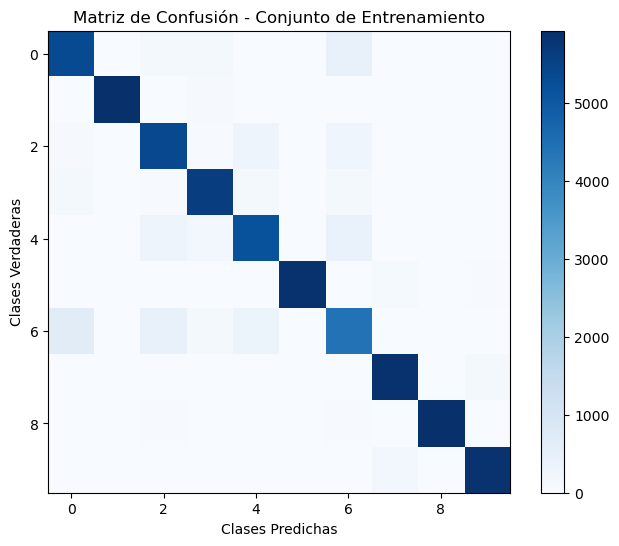

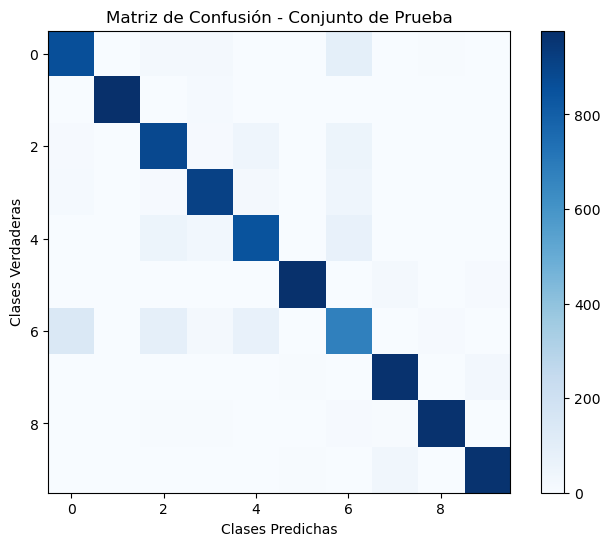

In [9]:
# Visualizar la matriz de confusión del conjunto de entrenamiento
plt.figure(figsize=(8, 6))
plt.imshow(confusion_train, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusión - Conjunto de Entrenamiento')
plt.colorbar()
plt.xlabel('Clases Predichas')
plt.ylabel('Clases Verdaderas')
plt.show()

# Visualizar la matriz de confusión del conjunto de prueba
plt.figure(figsize=(8, 6))
plt.imshow(confusion_test, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusión - Conjunto de Prueba')
plt.colorbar()
plt.xlabel('Clases Predichas')
plt.ylabel('Clases Verdaderas')
plt.show()

## Modelo con optimazer Adamax

In [10]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adamax", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 11s 24ms/step - loss: 0.2607 - accuracy: 0.9051 - val_loss: 0.2500 - val_accuracy: 0.9097
Epoch 2/15
422/422 [==============================] - 10s 24ms/step - loss: 0.2557 - accuracy: 0.9080 - val_loss: 0.2482 - val_accuracy: 0.9085
Epoch 3/15
422/422 [==============================] - 9s 21ms/step - loss: 0.2553 - accuracy: 0.9081 - val_loss: 0.2486 - val_accuracy: 0.9108
Epoch 4/15
422/422 [==============================] - 10s 23ms/step - loss: 0.2547 - accuracy: 0.9075 - val_loss: 0.2476 - val_accuracy: 0.9113
Epoch 5/15
422/422 [==============================] - 9s 22ms/step - loss: 0.2522 - accuracy: 0.9094 - val_loss: 0.2519 - val_accuracy: 0.9103
Epoch 6/15
422/422 [==============================] - 10s 23ms/step - loss: 0.2490 - accuracy: 0.9099 - val_loss: 0.2496 - val_accuracy: 0.9110
Epoch 7/15
422/422 [==============================] - 10s 23ms/step - loss: 0.2500 - accuracy: 0.9098 - val_loss: 0.2473 - val_accuracy: 0

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.25594857335090637
Test accuracy: 0.9068999886512756


In [12]:
# Predecir las probabilidades de clase en los conjuntos de entrenamiento y prueba
y_train_probs1 = model.predict(x_train)
y_test_probs1 = model.predict(x_test)

# Convertir las probabilidades en etiquetas de clase
y_train_predi = np.argmax(y_train_probs1, axis=1)
y_test_predi = np.argmax(y_test_probs1, axis=1)

313/313 [==============================] - 2s 4ms/step


In [13]:
# Assuming y_train_pred and y_test_pred are defined
confusion_train1 = confusion_matrix(np.argmax(y_train, axis=1), y_train_predi)
confusion_test1 = confusion_matrix(np.argmax(y_test, axis=1), y_test_predi)

# Print confusion matrices
print("Confusion Matrix - Training Set:")
print(confusion_train1)
print("\nConfusion Matrix - Test Set:")
print(confusion_test1)

Confusion Matrix - Training Set:
[[5309    2   73  109   11    0  471    0   25    0]
 [   1 5914    0   67   10    0    5    0    3    0]
 [  60    4 5263   40  323    0  303    0    7    0]
 [  68   11   23 5636  120    0  137    0    5    0]
 [   6    4  176  135 5389    0  285    0    5    0]
 [   0    0    0    0    0 5908    0   57    7   28]
 [ 534    4  320  105  367    0 4648    0   22    0]
 [   0    0    0    0    0   16    0 5872    2  110]
 [   6    0   12    5   17    5   26    3 5926    0]
 [   0    0    0    0    1    9    0  136    2 5852]]

Confusion Matrix - Test Set:
[[857   0  16  23   3   1  95   0   5   0]
 [  2 974   0  17   2   0   4   0   1   0]
 [ 10   0 866  10  48   0  64   0   2   0]
 [  6   0   9 919  23   0  41   0   2   0]
 [  0   0  36  24 879   0  60   0   1   0]
 [  0   0   0   0   0 976   0  16   0   8]
 [128   0  62  23  85   0 690   0  12   0]
 [  0   0   0   0   0   8   0 969   0  23]
 [  3   1   4   3   1   2   4   4 978   0]
 [  1   0   0   0  

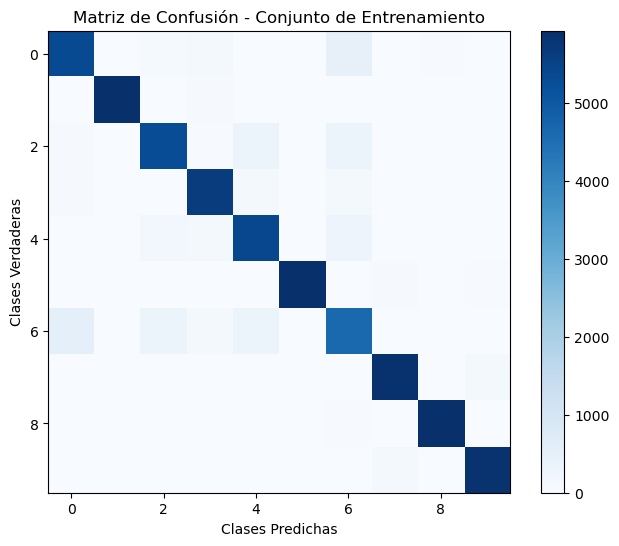

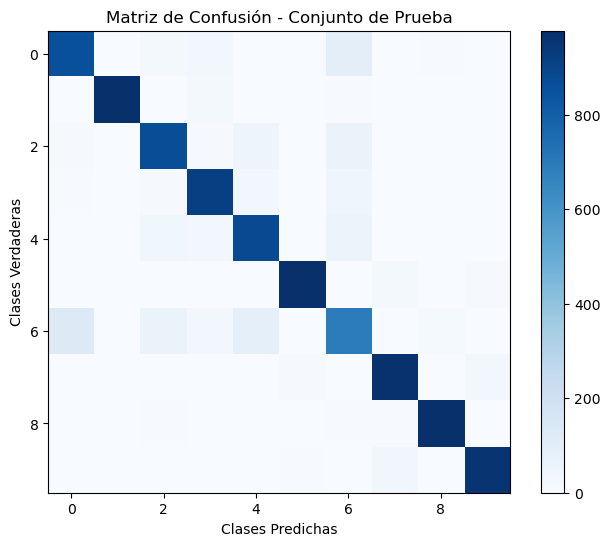

In [14]:
# Visualizar la matriz de confusión del conjunto de entrenamiento
plt.figure(figsize=(8, 6))
plt.imshow(confusion_train1, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusión - Conjunto de Entrenamiento')
plt.colorbar()
plt.xlabel('Clases Predichas')
plt.ylabel('Clases Verdaderas')
plt.show()

# Visualizar la matriz de confusión del conjunto de prueba
plt.figure(figsize=(8, 6))
plt.imshow(confusion_test1, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusión - Conjunto de Prueba')
plt.colorbar()
plt.xlabel('Clases Predichas')
plt.ylabel('Clases Verdaderas')
plt.show()

## Comparación Matrices

In [15]:
confusion_train = confusion_matrix(np.argmax(y_train, axis=1), y_train_pred)
confusion_test = confusion_matrix(np.argmax(y_test, axis=1), y_test_pred)
confusion_train1 = confusion_matrix(np.argmax(y_train, axis=1), y_train_predi)
confusion_test1 = confusion_matrix(np.argmax(y_test, axis=1), y_test_predi)

print("Confusion Matrix - Training Set:")
print(confusion_train)
print("\nConfusion Matrix - Test Set:")
print(confusion_test)

print("Confusion Matrix - Training Set:")
print(confusion_train1)
print("\nConfusion Matrix - Test Set:")
print(confusion_test1)

Confusion Matrix - Training Set:
[[5311    4  109  111   15    0  427    0   23    0]
 [   1 5921    3   62    7    0    5    0    1    0]
 [  51    3 5348   44  281    0  268    0    5    0]
 [  98   17   38 5594  114    0  138    0    1    0]
 [   6    6  278  165 5137    0  405    0    3    0]
 [   2    1    0    3    0 5869    0   75    9   41]
 [ 656    7  447  115  353    0 4403    0   19    0]
 [   0    0    0    0    0   17    0 5858    7  118]
 [  11    1   25   13   18    6   43    3 5878    2]
 [   0    0    0    0    0    7    1  144    2 5846]]

Confusion Matrix - Test Set:
[[861   0  22  19   3   1  89   0   5   0]
 [  0 977   1  15   3   0   3   0   1   0]
 [ 11   0 884   8  43   0  53   0   1   0]
 [ 13   1  11 912  21   0  42   0   0   0]
 [  0   0  51  29 846   0  73   0   1   0]
 [  0   0   0   0   0 973   0  17   0  10]
 [140   1  86  19  71   0 672   0  11   0]
 [  0   0   0   0   0   7   0 967   1  25]
 [  2   1   5   5   1   2  11   4 969   0]
 [  0   0   1   0  